In [201]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

from sklearn.model_selection import train_test_split, KFold, cross_val_score

#regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy.stats as stats

#neural networks?? 
from keras.models import Sequential
from keras.layers import Dense

In [202]:
df = pd.read_csv('mydramalist.csv')

In [203]:
df.head()

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,url
0,Tunnel,Drama,South Korea,16,2017,OCN,60 min.,"32,651","Nam Ki Hoon, Shin Yong Hwi",Lee Eun Mi,8.7,"14,787","Choi Jin Hyuk,Yoon Hyun Min,Lee Yoo Young,Jo H...","Thriller,Mystery,Sci-Fi,Fantasy","Time Travel,Murder,Criminal Profiler,Serial K...","In 1986, Park Gwang Ho works as an excellent a...",https://i.mydramalist.com/JkryYc.jpg?v=1
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1 hr. 13 min.,"16,043",Jung Ji Hyun,Kwon Do Eun,8.8,"2,119","Kim Tae Ri,Nam Joo Hyuk,Bona,Choi Hyun Wook,Le...","Romance,Life,Youth,Drama","Athlete,Fencing,1990s,Coming Of Age,Bold Fema...",The story is set in 1998 and tells the stories...,https://i.mydramalist.com/ROOPo_4c.jpg?v=1
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1 hr. 10 min.,"31,855","Yoo In Shik, Lee Gil Bok",Kang Eun Kyung,8.7,"15,880","Han Seok Kyu,Ahn Hyo Seop,Lee Sung Kyung,Kim J...","Romance,Drama,Medical,Melodrama","Hospital,Smart Male Lead,Character Developmen...","A 혫real doctor혬 story set in a small, humble h...",https://i.mydramalist.com/Rr7DEc.jpg?v=1
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,52 min.,"40,962",Kim Sung Ho,Yoon Ji Ryun,9.2,"20,399","Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Life,Drama,Family","Autism,Uncle-Nephew Relationship,Death,Savant...",Geu Roo is a young autistic man. He works for ...,https://i.mydramalist.com/Rle36_4c.jpg?v=1
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1 hr. 25 min.,"1,10,352",Lee Jeong Hyo,Park Ji Eun,9.0,"62,174","Hyun Bin,Son Ye Jin,Seo Ji Hye,Kim Jung Hyun,Y...","Military,Comedy,Romance,Political","North And South Korea,Star Crossed Lovers,Str...","After getting into a paragliding accident, Sou...",https://i.mydramalist.com/XrN2dc.jpg?v=1


# Cleaning numerical column data - removing n/a

In [204]:
df.drop('url',axis=1,inplace=True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3577 non-null   object 
 1   category         3577 non-null   object 
 2   country          3577 non-null   object 
 3   num_episodes     3577 non-null   int64  
 4   aired            3577 non-null   int64  
 5   orginal_network  3438 non-null   object 
 6   duration         3517 non-null   object 
 7   watchers         3577 non-null   object 
 8   director         3577 non-null   object 
 9   screenwriter     2561 non-null   object 
 10  rating           3577 non-null   float64
 11  num_raters       3577 non-null   object 
 12  cast_names       3577 non-null   object 
 13  genre_names      3564 non-null   object 
 14  tag_names        3577 non-null   object 
 15  synopsis         3538 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 447.2+ KB


In [206]:
#turning watchers/num_raters columns from object to integer
df['watchers']=df['watchers'].str.replace(',','')
df['watchers'] = df['watchers'].astype(str).astype(int)

In [207]:
df['num_raters']=df['num_raters'].str.replace(',','')
df['num_raters'] = df['num_raters'].replace(['1 user '],'1')

In [208]:
df['num_raters'] = df['num_raters'].astype(str).astype(int)

In [209]:
df.describe()

,num_episodes,aired,watchers,rating,num_raters
count,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,26.050042,2015.627062,7787.430249,7.809785,3452.841208
std,35.420809,5.012415,14257.104960,0.462116,7315.262677
min,1.000000,2000.000000,5.000000,6.100000,1.000000
25%,10.000000,2013.000000,1104.000000,7.500000,362.000000
50%,16.000000,2017.000000,2791.000000,7.900000,929.000000
75%,31.000000,2020.000000,7808.000000,8.100000,2978.000000
max,682.000000,2022.000000,156368.000000,9.200000,83106.000000


In [210]:
df.aired.astype('int32')
pd.to_datetime(df.aired, format = '%Y')

0      2017-01-01
1      2022-01-01
2      2020-01-01
3      2021-01-01
4      2020-01-01
          ...    
3572   2015-01-01
3573   2010-01-01
3574   2011-01-01
3575   2016-01-01
3576   2019-01-01
Name: aired, Length: 3577, dtype: datetime64[ns]

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3577 non-null   object 
 1   category         3577 non-null   object 
 2   country          3577 non-null   object 
 3   num_episodes     3577 non-null   int64  
 4   aired            3577 non-null   int64  
 5   orginal_network  3438 non-null   object 
 6   duration         3517 non-null   object 
 7   watchers         3577 non-null   int32  
 8   director         3577 non-null   object 
 9   screenwriter     2561 non-null   object 
 10  rating           3577 non-null   float64
 11  num_raters       3577 non-null   int32  
 12  cast_names       3577 non-null   object 
 13  genre_names      3564 non-null   object 
 14  tag_names        3577 non-null   object 
 15  synopsis         3538 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(11)
memory usage: 

In [212]:
#Is raters or watchers a more viable variable? 
watchers_count = len([i for i in df['watchers'] if i > 500])
print ("Watchers greater than 500 : " + str(watchers_count))

Watchers greater than 500 : 3008


In [213]:
#eliminate the entries with less than x raters? 
raters_count = len([i for i in df['num_raters'] if i > 200])
print ("Raters greater than 200 : " + str(raters_count))

Raters greater than 200 : 2927


In [214]:
raters = df['num_raters'] >= 200
raters.value_counts()

True     2927
False     650
Name: num_raters, dtype: int64

In [215]:
# dropping low rate count dramas
df2= df.drop(df.loc[df['num_raters']<=200].index)

In [216]:
# drop null values in genre list
df2 = df2[df2['genre_names'].notna()]
df2 = df2[df2['duration'].notna()]
df2 = df2[df2['screenwriter'].notna()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 3546
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2211 non-null   object 
 1   category         2211 non-null   object 
 2   country          2211 non-null   object 
 3   num_episodes     2211 non-null   int64  
 4   aired            2211 non-null   int64  
 5   orginal_network  2182 non-null   object 
 6   duration         2211 non-null   object 
 7   watchers         2211 non-null   int32  
 8   director         2211 non-null   object 
 9   screenwriter     2211 non-null   object 
 10  rating           2211 non-null   float64
 11  num_raters       2211 non-null   int32  
 12  cast_names       2211 non-null   object 
 13  genre_names      2211 non-null   object 
 14  tag_names        2211 non-null   object 
 15  synopsis         2211 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(11)
memory usage: 

In [217]:
# remove dramas with only 1 episode. wouldnt this be a movie? 
episodes = df2['num_episodes'] > 1
episodes.value_counts()

True     2210
False       1
Name: num_episodes, dtype: int64

In [218]:
df2['duration']

0             60 min.
1       1 hr. 13 min.
2       1 hr. 10 min.
3             52 min.
4       1 hr. 25 min.
            ...      
3480          24 min.
3511          25 min.
3533          48 min.
3538          24 min.
3546          50 min.
Name: duration, Length: 2211, dtype: object

In [219]:
"""
df2['parts']=df2.duration.str.findall('\d+')
#df2['timedelta']=df2.parts.apply(lambda x: pd.to_timedelta((0 if len(x) < 2 else int(x[0])) * 3600 + int(x[-1])*60, unit='s'))
df2['hours and minutes']=df2.parts.apply(lambda x: f"{0 if len(x) < 2 else int(x[0]):02}:{int(x[-1]):02}")
df2 = df2.drop(columns=['duration', 'parts'])
df2.head()
"""

'\ndf2[\'parts\']=df2.duration.str.findall(\'\\d+\')\n#df2[\'timedelta\']=df2.parts.apply(lambda x: pd.to_timedelta((0 if len(x) < 2 else int(x[0])) * 3600 + int(x[-1])*60, unit=\'s\'))\ndf2[\'hours and minutes\']=df2.parts.apply(lambda x: f"{0 if len(x) < 2 else int(x[0]):02}:{int(x[-1]):02}")\ndf2 = df2.drop(columns=[\'duration\', \'parts\'])\ndf2.head()\n'

In [220]:
#df2.rename(columns = {'hours and minutes':'duration'}, inplace=True)

In [221]:
df2['duration']= df2['duration'].str.replace('60 min.','1 hr. 00 min.')

In [222]:
import datetime as dt

def transform(t):
    if 'hr.' in t:
        return dt.datetime.strptime(t, '%I hr. %M min.').strftime('%I:%M')
    return dt.datetime.strptime(t, '%M min.').strftime('00:%M')

df2['duration'] = df2['duration'].apply(lambda x: transform(x))
df2.head()

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis
0,Tunnel,Drama,South Korea,16,2017,OCN,01:00,32651,"Nam Ki Hoon, Shin Yong Hwi",Lee Eun Mi,8.7,14787,"Choi Jin Hyuk,Yoon Hyun Min,Lee Yoo Young,Jo H...","Thriller,Mystery,Sci-Fi,Fantasy","Time Travel,Murder,Criminal Profiler,Serial K...","In 1986, Park Gwang Ho works as an excellent a..."
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,01:13,16043,Jung Ji Hyun,Kwon Do Eun,8.8,2119,"Kim Tae Ri,Nam Joo Hyuk,Bona,Choi Hyun Wook,Le...","Romance,Life,Youth,Drama","Athlete,Fencing,1990s,Coming Of Age,Bold Fema...",The story is set in 1998 and tells the stories...
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,01:10,31855,"Yoo In Shik, Lee Gil Bok",Kang Eun Kyung,8.7,15880,"Han Seok Kyu,Ahn Hyo Seop,Lee Sung Kyung,Kim J...","Romance,Drama,Medical,Melodrama","Hospital,Smart Male Lead,Character Developmen...","A 혫real doctor혬 story set in a small, humble h..."
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,00:52,40962,Kim Sung Ho,Yoon Ji Ryun,9.2,20399,"Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Life,Drama,Family","Autism,Uncle-Nephew Relationship,Death,Savant...",Geu Roo is a young autistic man. He works for ...
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,01:25,110352,Lee Jeong Hyo,Park Ji Eun,9.0,62174,"Hyun Bin,Son Ye Jin,Seo Ji Hye,Kim Jung Hyun,Y...","Military,Comedy,Romance,Political","North And South Korea,Star Crossed Lovers,Str...","After getting into a paragliding accident, Sou..."


In [224]:
df2

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis
0,Tunnel,Drama,South Korea,16,2017,OCN,01:00,32651,"Nam Ki Hoon, Shin Yong Hwi",Lee Eun Mi,8.7,14787,"Choi Jin Hyuk,Yoon Hyun Min,Lee Yoo Young,Jo H...","Thriller,Mystery,Sci-Fi,Fantasy","Time Travel,Murder,Criminal Profiler,Serial K...","In 1986, Park Gwang Ho works as an excellent a..."
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,01:13,16043,Jung Ji Hyun,Kwon Do Eun,8.8,2119,"Kim Tae Ri,Nam Joo Hyuk,Bona,Choi Hyun Wook,Le...","Romance,Life,Youth,Drama","Athlete,Fencing,1990s,Coming Of Age,Bold Fema...",The story is set in 1998 and tells the stories...
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,01:10,31855,"Yoo In Shik, Lee Gil Bok",Kang Eun Kyung,8.7,15880,"Han Seok Kyu,Ahn Hyo Seop,Lee Sung Kyung,Kim J...","Romance,Drama,Medical,Melodrama","Hospital,Smart Male Lead,Character Developmen...","A 혫real doctor혬 story set in a small, humble h..."
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,00:52,40962,Kim Sung Ho,Yoon Ji Ryun,9.2,20399,"Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Life,Drama,Family","Autism,Uncle-Nephew Relationship,Death,Savant...",Geu Roo is a young autistic man. He works for ...
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,01:25,110352,Lee Jeong Hyo,Park Ji Eun,9.0,62174,"Hyun Bin,Son Ye Jin,Seo Ji Hye,Kim Jung Hyun,Y...","Military,Comedy,Romance,Political","North And South Korea,Star Crossed Lovers,Str...","After getting into a paragliding accident, Sou..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,00:24,980,"Tasaki Ryuta, Suzumura Nobuhiro","Komura Junko, Arakawa Naruhisa",7.9,353,"Wada Masato,Ogino Karin,Hinami Kyoko,Takagi Sh...","Tokusatsu,Comedy,Life,Martial Arts,Sci-Fi","Parody,Otaku,Super Sentai,Superhero",This unofficial 36.1st installment in the long...
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,00:25,727,Amemiya Keita,"Kobayashi Yasuko, Era Itaru",7.9,330,"Fujita Rei,Kageyama Hironobu,Konishi Ryosei,Hi...","Action,Tokusatsu,Horror,Fantasy","Superhero,Sword-fight,Nudity,Supernatural,Fri...",Garo: Makai Senki is a Japanese tokusatsu tele...
3533,My Ride,Drama,Thailand,10,2022,GMM 25,00:48,7006,Por Saroch Nuamsamran,"Fluke Teerapat Lohanan, Tanachot Prapasri",7.9,236,"Fame Chawinroj Likitchareonsakul,Fluke Pongsak...","Comedy,Romance","Friends To Lovers,Doctor Male Lead,Taxi Drive...","This is the story of Mork and Tawan, a motorcy..."
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,00:24,849,"Ninomiya Takashi, Yoshino Mamoru, Tamazawa K...",Kitagawa Ayako,7.9,223,"Fukuhara Haruka,Ohara Yuno,Tanabe Momoko,Yanai...","Adventure,Friendship,Comedy,Drama","Adapted From A Manga,Hobbies,Classmate,Nice F...",This is the story of a winter day. Kagamihara ...


In [225]:
import datetime as dt
start_dt = dt.datetime.strptime("00:00", '%H:%M')
df2['duration'] = [float('{:0.3f}'.format((dt.datetime.strptime(time, '%H:%M') - start_dt).seconds/3600)) for time in df2['duration']]

In [226]:
df2

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"Nam Ki Hoon, Shin Yong Hwi",Lee Eun Mi,8.7,14787,"Choi Jin Hyuk,Yoon Hyun Min,Lee Yoo Young,Jo H...","Thriller,Mystery,Sci-Fi,Fantasy","Time Travel,Murder,Criminal Profiler,Serial K...","In 1986, Park Gwang Ho works as an excellent a..."
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,Jung Ji Hyun,Kwon Do Eun,8.8,2119,"Kim Tae Ri,Nam Joo Hyuk,Bona,Choi Hyun Wook,Le...","Romance,Life,Youth,Drama","Athlete,Fencing,1990s,Coming Of Age,Bold Fema...",The story is set in 1998 and tells the stories...
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"Yoo In Shik, Lee Gil Bok",Kang Eun Kyung,8.7,15880,"Han Seok Kyu,Ahn Hyo Seop,Lee Sung Kyung,Kim J...","Romance,Drama,Medical,Melodrama","Hospital,Smart Male Lead,Character Developmen...","A 혫real doctor혬 story set in a small, humble h..."
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,Kim Sung Ho,Yoon Ji Ryun,9.2,20399,"Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Life,Drama,Family","Autism,Uncle-Nephew Relationship,Death,Savant...",Geu Roo is a young autistic man. He works for ...
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,Lee Jeong Hyo,Park Ji Eun,9.0,62174,"Hyun Bin,Son Ye Jin,Seo Ji Hye,Kim Jung Hyun,Y...","Military,Comedy,Romance,Political","North And South Korea,Star Crossed Lovers,Str...","After getting into a paragliding accident, Sou..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,0.400,980,"Tasaki Ryuta, Suzumura Nobuhiro","Komura Junko, Arakawa Naruhisa",7.9,353,"Wada Masato,Ogino Karin,Hinami Kyoko,Takagi Sh...","Tokusatsu,Comedy,Life,Martial Arts,Sci-Fi","Parody,Otaku,Super Sentai,Superhero",This unofficial 36.1st installment in the long...
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,0.417,727,Amemiya Keita,"Kobayashi Yasuko, Era Itaru",7.9,330,"Fujita Rei,Kageyama Hironobu,Konishi Ryosei,Hi...","Action,Tokusatsu,Horror,Fantasy","Superhero,Sword-fight,Nudity,Supernatural,Fri...",Garo: Makai Senki is a Japanese tokusatsu tele...
3533,My Ride,Drama,Thailand,10,2022,GMM 25,0.800,7006,Por Saroch Nuamsamran,"Fluke Teerapat Lohanan, Tanachot Prapasri",7.9,236,"Fame Chawinroj Likitchareonsakul,Fluke Pongsak...","Comedy,Romance","Friends To Lovers,Doctor Male Lead,Taxi Drive...","This is the story of Mork and Tawan, a motorcy..."
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,0.400,849,"Ninomiya Takashi, Yoshino Mamoru, Tamazawa K...",Kitagawa Ayako,7.9,223,"Fukuhara Haruka,Ohara Yuno,Tanabe Momoko,Yanai...","Adventure,Friendship,Comedy,Drama","Adapted From A Manga,Hobbies,Classmate,Nice F...",This is the story of a winter day. Kagamihara ...


# cleaning categorical column data

In [227]:
#DIRECTOR lets only take the first name listed. 
#df2['director'] = df2.director.apply(lambda x: x.split(',')[0] if ',' in x else x)
#dir into a diff format? like cast? 
df2['director'] = df2['director'].str.split(',')

In [228]:
#lets try only the first two listed genres
df2['genre_names']= df2['genre_names'].str.replace(' ','')
df2['main_genre'] = df2['genre_names'].str.split(',').str[0]

In [229]:
#df2['main_genre'] = df2['genre_names'].str[:1]
df2['genre_names'] = df2['genre_names'].str.split(',').str[:2]

In [230]:
df2['tag_names'] = df2['tag_names'].str.split(',').str[:3]

In [231]:
# taking the first 3 listed cast names
df2['cast_names'] = df2['cast_names'].str.split(',')
#first 3 listed cast names? 
#df2['cast_names'] = df2['cast_names'].str[:3]

In [232]:
# screenwriter as well
df2['screenwriter'] = df2['screenwriter'].str.split(',')


In [234]:
df2

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],8.7,14787,"[Choi Jin Hyuk, Yoon Hyun Min, Lee Yoo Young, ...","[Thriller, Mystery]","[ Time Travel, Murder, Criminal Profiler]","In 1986, Park Gwang Ho works as an excellent a...",Thriller
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],8.8,2119,"[Kim Tae Ri, Nam Joo Hyuk, Bona, Choi Hyun Woo...","[Romance, Life]","[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],8.7,15880,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],9.2,20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],9.0,62174,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,0.400,980,"[Tasaki Ryuta, Suzumura Nobuhiro]","[Komura Junko, Arakawa Naruhisa]",7.9,353,"[Wada Masato, Ogino Karin, Hinami Kyoko, Takag...","[Tokusatsu, Comedy]","[ Parody, Otaku, Super Sentai]",This unofficial 36.1st installment in the long...,Tokusatsu
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,0.417,727,[Amemiya Keita],"[Kobayashi Yasuko, Era Itaru]",7.9,330,"[Fujita Rei, Kageyama Hironobu, Konishi Ryosei...","[Action, Tokusatsu]","[ Superhero, Sword-fight, Nudity]",Garo: Makai Senki is a Japanese tokusatsu tele...,Action
3533,My Ride,Drama,Thailand,10,2022,GMM 25,0.800,7006,[Por Saroch Nuamsamran],"[Fluke Teerapat Lohanan, Tanachot Prapasri]",7.9,236,"[Fame Chawinroj Likitchareonsakul, Fluke Pongs...","[Comedy, Romance]","[ Friends To Lovers, Doctor Male Lead, Taxi Dr...","This is the story of Mork and Tawan, a motorcy...",Comedy
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,0.400,849,"[Ninomiya Takashi, Yoshino Mamoru, Tamazaw...",[Kitagawa Ayako],7.9,223,"[Fukuhara Haruka, Ohara Yuno, Tanabe Momoko, Y...","[Adventure, Friendship]","[ Adapted From A Manga, Hobbies, Classmate]",This is the story of a winter day. Kagamihara ...,Adventure


In [235]:
#not needed anymore?
#df2['genre_names']= df2['genre_names'].str.replace(' ','')
#df2['genre_names'] = df2['genre_names'].str.split(',')
#df2['director'] = df2['director'].str.split(',')
#df2['cast_names'] = df2['cast_names'].str.split(', ')
#df2['tag_names'] = df2['tag_names'].str.split(',')

In [236]:
df2['main_genre'].value_counts()
df2.main_genre.unique()

array(['Thriller', 'Romance', 'Life', 'Military', 'Action', 'Mystery',
       'Historical', 'Friendship', 'Adventure', 'Psychological', 'Comedy',
       'Business', 'Horror', 'Food', 'Drama', 'Music', 'Youth', 'Law',
       'Crime', 'School', 'Tokusatsu', 'Family', 'Medical', 'Sci-Fi'],
      dtype=object)

Top appearing cast EDA

In [237]:
topcast = df2['cast_names'].explode('cast_names').value_counts()

In [238]:
top_cast = pd.DataFrame(df2['cast_names'].explode('cast_names').value_counts().reset_index().values, columns=["Cast", "Count"])
top_castindex = top_cast.sort_index(axis = 0, ascending=True)
top_castindex

,Cast,Count
0,Fujiki Naohito,20
1,Yamashita Tomohisa,19
2,Toda Erika,18
3,Lee Joon Hyuk,18
4,Kimura Takuya,18
...,...,...
5284,Jang In Sub,1
5285,Yeom Dong Hun,1
5286,Fukagawa Mai,1
5287,Choi Woong,1


In [239]:
top_castindex.set_index('Cast', inplace=True)

<AxesSubplot:xlabel='Cast'>

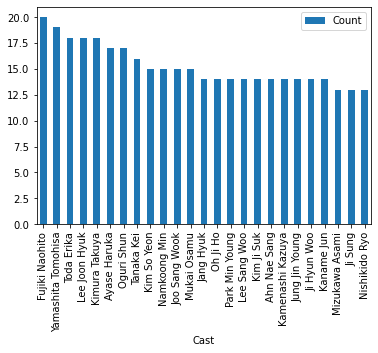

In [240]:
top25cast = top_castindex.head(25)
top25cast.plot(kind='bar')

Top appearing director

In [241]:
topdir = pd.DataFrame(df2['director'].value_counts().reset_index().values, columns=["Director", "Count"])
topdirindex = topdir.sort_index(axis = 0, ascending=True)
topdirindex

,Director,Count
0,[Fon Kanittha Kwunyoo],11
1,[Kwak Jung Hwan],9
2,[Koo Ekkasit Trakulkasemsuk],9
3,[Kim Byung Soo],9
4,[Wu Qiang],8
...,...,...
1494,"[Fujio Takashi, Furusawa Takeshi, Murakami...",1
1495,"[Leung Sing Kuen, Li Wei Ji]",1
1496,"[Hong Jong Chan, Jin Hyeok]",1
1497,"[Ahn Gil Ho, Yoo In Shik]",1


In [242]:
topdirindex.set_index('Director', inplace=True)

<AxesSubplot:xlabel='Director'>

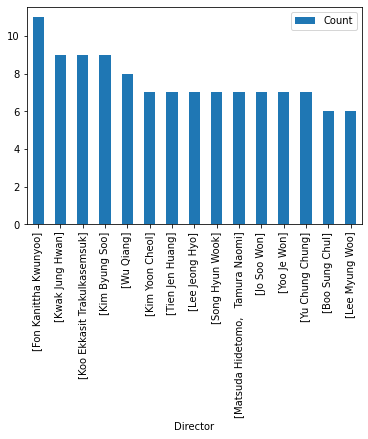

In [243]:
top15dir = topdirindex.head(15)
top15dir.plot(kind='bar')

Tags ? seperate these? 

In [244]:
top_tags = pd.DataFrame(df2['tag_names'].explode('tag_names').value_counts().reset_index().values, columns=["Tag", "Count"])
top_tagsindex = top_tags.sort_index(axis = 0, ascending=True)
top_tagsindex

,Tag,Count
0,Strong Female Lead,101
1,Investigation,64
2,Adapted From A Novel,63
3,Investigation,56
4,Adapted From A Manga,56
...,...,...
1961,Firefighters,1
1962,Aggressive Female Lead,1
1963,Determined Female Lead,1
1964,Female Lead Action Scenes,1


In [245]:
top_tagsindex.set_index('Tag', inplace=True)

<AxesSubplot:xlabel='Tag'>

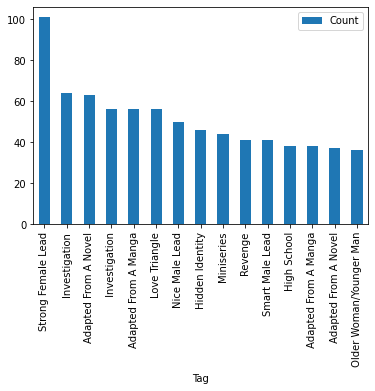

In [246]:
top15tag = top_tagsindex.head(15)
top15tag.plot(kind='bar')

Lets try doing this EDA with only the top rated dramas
Maybe ones rated 8.5+ ? 

In [247]:
dftoprated = df2.loc[(df2['rating'] >= 8.6)]

In [248]:
dftoprated= dftoprated.sort_values(by="rating",ascending=False)

In [249]:
dftoprated

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],9.2,20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life
48,The Untamed,Drama,China,50,2019,Tencent Video,0.750,61954,"[Steve Cheng, Chan Ka Lam]","[Deng Yao Yu, Yang Xia, Guo Guang Yun, J...",9.1,30974,"[Xiao Zhan, Wang Yi Bo, Wang Zhuo Cheng, Xuan ...","[Historical, Mystery]","[ Adapted From A Novel, Playful Male Lead, Cen...","Wei Wu Xian and Lan Wang Ji, two talented disc...",Historical
34,Nirvana in Fire,Drama,China,54,2015,BTV,0.750,19375,"[Kong Sheng, Li Xue]",[Hai Yan],9.1,6692,"[Hu Ge, Liu Tao, Wang Kai, Chen Long, Victor H...","[Historical, Wuxia]","[ Smart Male Lead, Power Struggle, Tragic Past]","In sixth-century China, Emperor Xiaoxuan of So...",Historical
17,Flower of Evil,Drama,South Korea,16,2020,tvN,1.167,66980,"[Kim Chul Gyu, Yoon Jong Ho]",[Yoo Jung Hee],9.1,30491,"[Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo...","[Thriller, Romance]","[ Married Couple, Deception, Family Secret]",Although Baek Hee Sung is hiding a dark secret...,Thriller
41,Hospital Playlist 2,Drama,South Korea,12,2021,Netflix tvN,1.667,30325,[Shin Won Ho],[Lee Woo Jung],9.1,14059,"[Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Ki...","[Friendship, Romance]","[ Workplace, Strong Friendship, Best Friends]",Everyday is extraordinary for five doctors and...,Friendship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,Ultimate Note,Drama,China,37,2021,iQiyi,0.750,5140,"[Zou Xi, Wei Li Zhou]","[Zhang Yuan Ang, Tian Liang Liang]",8.6,1534,"[Joseph Zeng, Xiao Yu Liang, Cheng Fang Xu, Li...","[Action, Adventure]","[ Tomb Raiding, Bromance, Survival]",Wu Xie and Wang Pan Zi are trying to find out ...,Action
116,Children of Nobody,Drama,South Korea,32,2019,MBC,0.500,13050,[Choi Jung Gyu],[Do Hyun Jung],8.6,3940,"[Kim Sun Ah, Lee Yi Kyung, Nam Gyu Ri, Cha Hak...","[Thriller, Mystery]","[ Trauma, Child Abuse, Smart Female Lead]",Cha Woo Kyung is a child counselor who works a...,Thriller
51,"It's Okay, That's Love",Drama,South Korea,16,2014,SBS,1.000,71999,[Kim Kyu Tae],[Noh Hee Kyung],8.6,35635,"[Jo In Sung, Gong Hyo Jin, Sung Dong Il, Lee K...","[Psychological, Comedy]","[ Strong Female Lead, Psychiatry, Mental Health]","Despite being a bit of a prickly pear, Jang Ja...",Psychological
50,Kazoku Game,Drama,Japan,10,2013,Fuji TV,0.767,9811,"[Iwata Kazuyuki, Sato Yuichi]",[Muto Shogo],8.6,3650,"[Sakurai Sho, Kamiki Ryunosuke, Uragami Seishu...","[Mystery, Psychological]","[ School Bullying, Dysfunctional Family, Hidde...",The story revolves around an eccentric home tu...,Mystery


In [250]:
stars_exploded = df2.explode('cast_names')
stars_20 = stars_exploded['cast_names'].value_counts()[:20].index.tolist()

In [251]:
stars_20

['Fujiki Naohito',
 'Yamashita Tomohisa',
 'Toda Erika',
 'Lee Joon Hyuk',
 'Kimura Takuya',
 'Ayase Haruka',
 'Oguri Shun',
 'Tanaka Kei',
 'Kim So Yeon',
 'Namkoong Min',
 'Joo Sang Wook',
 'Mukai Osamu',
 'Jang Hyuk',
 'Oh Ji Ho',
 'Park Min Young',
 'Lee Sang Woo',
 'Kim Ji Suk',
 'Ahn Nae Sang',
 'Kamenashi Kazuya',
 'Jung Jin Young']

In [252]:
top_cast = pd.DataFrame(dftoprated['cast_names'].explode('cast_names').value_counts().reset_index().values, columns=["Cast", "Count"])
top_castindex = top_cast.sort_index(axis = 0, ascending=True)
top_castindex

,Cast,Count
0,Lee Joon Hyuk,6
1,Jung Kyung Ho,5
2,Yoo Yeon Seok,4
3,Yoon Se Ah,4
4,Sung Dong Il,4
...,...,...
607,Cheng Yi,1
608,Lee Hong Nae,1
609,Ahn Suk Hwan,1
610,Yeom Hye Ran,1


In [253]:
top_castindex.set_index('Cast', inplace=True)

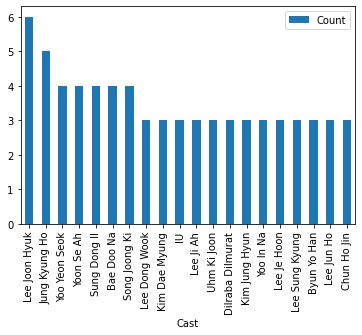

In [254]:
top20cast = top_castindex.head(20)
top20cast.plot(kind='bar')
top50cast = top_castindex.head(50)

In [255]:
topdir = pd.DataFrame(dftoprated['director'].value_counts().reset_index().values, columns=["Director", "Count"])
topdirindex = topdir.sort_index(axis = 0, ascending=True)
topdirindex

,Director,Count
0,[Kim Won Suk],4
1,[Shin Won Ho],3
2,[Lee Jeong Hyo],3
3,[Lee Jae Sang],2
4,[Ahn Gil Ho],2
...,...,...
105,[Park Joon Woo],1
106,[Sato Shinsuke],1
107,"[Hui Kai Dong, Wen De Guang, Guo Hao]",1
108,[Kim Sung Hoon],1


In [256]:
topdirindex.set_index('Director', inplace=True)

<AxesSubplot:xlabel='Director'>

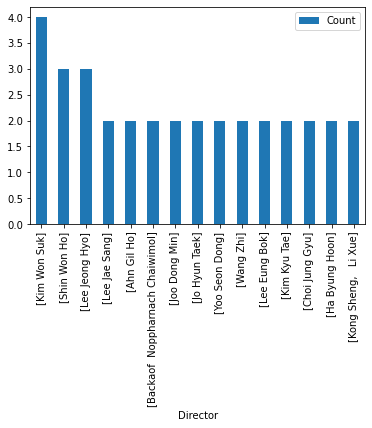

In [257]:
top15dir = topdirindex.head(15)
top15dir.plot(kind='bar')

In [258]:
dftoprated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 3 to 120
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             129 non-null    object 
 1   category         129 non-null    object 
 2   country          129 non-null    object 
 3   num_episodes     129 non-null    int64  
 4   aired            129 non-null    int64  
 5   orginal_network  129 non-null    object 
 6   duration         129 non-null    float64
 7   watchers         129 non-null    int32  
 8   director         129 non-null    object 
 9   screenwriter     129 non-null    object 
 10  rating           129 non-null    float64
 11  num_raters       129 non-null    int32  
 12  cast_names       129 non-null    object 
 13  genre_names      129 non-null    object 
 14  tag_names        129 non-null    object 
 15  synopsis         129 non-null    object 
 16  main_genre       129 non-null    object 
dtypes: float64(2), i

In [259]:
#maybe do screenwriter now there are less null? 


In [260]:
topsw = pd.DataFrame(dftoprated['screenwriter'].value_counts().reset_index().values, columns=["Screenwriter", "Count"])
topswindex = topsw.sort_index(axis = 0, ascending=True)
topswindex

,Screenwriter,Count
0,[Kim Eun Hee],4
1,[Yoo Hyun Mi],3
2,[Lee Woo Jung],3
3,[Park Jae Bum],3
4,[Noh Hee Kyung],3
...,...,...
99,[Gu Man],1
100,"[Oh Sang Ho, Lee Ji Hyun]",1
101,[Kuramitsu Yasuko],1
102,[Moon Yoo Seok],1


In [261]:
topswindex.set_index('Screenwriter', inplace=True)

<AxesSubplot:xlabel='Screenwriter'>

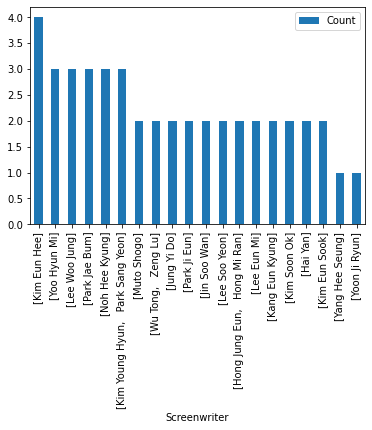

In [262]:
top5sw = topswindex.head(20)
top5sw.plot(kind='bar')

In [263]:
top_tags = pd.DataFrame(dftoprated['tag_names'].explode('tag_names').value_counts().reset_index().values, columns=["Tag", "Count"])
top_tagsindex = top_tags.sort_index(axis = 0, ascending=True)
top_tagsindex

,Tag,Count
0,Smart Male Lead,8
1,Strong Female Lead,8
2,Bromance,7
3,Strong Male Lead,7
4,Power Struggle,6
...,...,...
253,Police Procedural,1
254,Betrayal,1
255,Greed,1
256,Precognition,1


In [264]:
top_tagsindex.set_index('Tag', inplace=True)

<AxesSubplot:xlabel='Tag'>

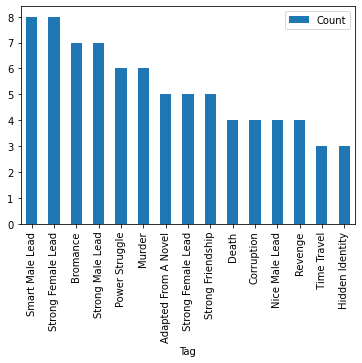

In [265]:
top15tag = top_tagsindex.head(15)
top15tag.plot(kind='bar')

In [266]:
df2

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],8.7,14787,"[Choi Jin Hyuk, Yoon Hyun Min, Lee Yoo Young, ...","[Thriller, Mystery]","[ Time Travel, Murder, Criminal Profiler]","In 1986, Park Gwang Ho works as an excellent a...",Thriller
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],8.8,2119,"[Kim Tae Ri, Nam Joo Hyuk, Bona, Choi Hyun Woo...","[Romance, Life]","[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],8.7,15880,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],9.2,20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],9.0,62174,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,0.400,980,"[Tasaki Ryuta, Suzumura Nobuhiro]","[Komura Junko, Arakawa Naruhisa]",7.9,353,"[Wada Masato, Ogino Karin, Hinami Kyoko, Takag...","[Tokusatsu, Comedy]","[ Parody, Otaku, Super Sentai]",This unofficial 36.1st installment in the long...,Tokusatsu
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,0.417,727,[Amemiya Keita],"[Kobayashi Yasuko, Era Itaru]",7.9,330,"[Fujita Rei, Kageyama Hironobu, Konishi Ryosei...","[Action, Tokusatsu]","[ Superhero, Sword-fight, Nudity]",Garo: Makai Senki is a Japanese tokusatsu tele...,Action
3533,My Ride,Drama,Thailand,10,2022,GMM 25,0.800,7006,[Por Saroch Nuamsamran],"[Fluke Teerapat Lohanan, Tanachot Prapasri]",7.9,236,"[Fame Chawinroj Likitchareonsakul, Fluke Pongs...","[Comedy, Romance]","[ Friends To Lovers, Doctor Male Lead, Taxi Dr...","This is the story of Mork and Tawan, a motorcy...",Comedy
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,0.400,849,"[Ninomiya Takashi, Yoshino Mamoru, Tamazaw...",[Kitagawa Ayako],7.9,223,"[Fukuhara Haruka, Ohara Yuno, Tanabe Momoko, Y...","[Adventure, Friendship]","[ Adapted From A Manga, Hobbies, Classmate]",This is the story of a winter day. Kagamihara ...,Adventure


# Other EDA 

[Text(0.5, 1.0, 'Drama Count by Year')]

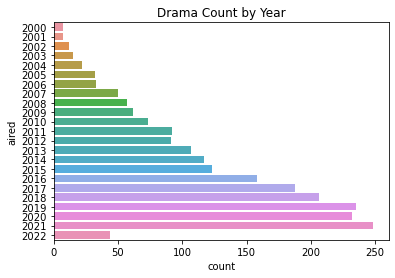

In [267]:
sns.countplot(y='aired', data=df2).set(title= 'Drama Count by Year')

<AxesSubplot:>

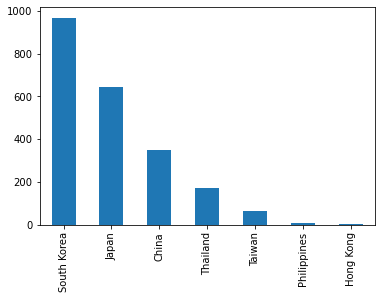

In [268]:
df2['country'].value_counts().plot(kind='bar')

[Text(0.5, 1.0, 'Drama Count by Country')]

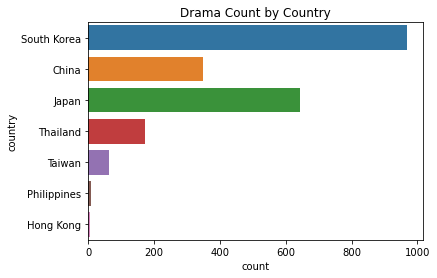

In [269]:
sns.countplot(y='country', data=df2).set(title= 'Drama Count by Country')

<AxesSubplot:xlabel='rating', ylabel='Density'>

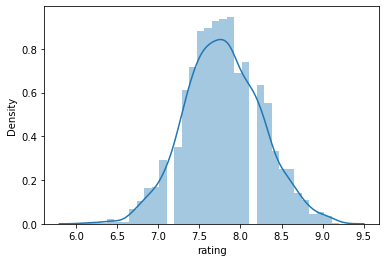

In [270]:
sns.distplot(df2['rating'])

In [271]:
df2.describe()

,num_episodes,aired,duration,watchers,rating,num_raters
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,22.093171,2015.516508,0.874959,10665.248304,7.788874,4761.099050
std,20.177726,4.821433,0.287153,16777.347361,0.464858,8635.432059
min,1.000000,2000.000000,0.067000,460.000000,6.100000,203.000000
25%,10.000000,2012.500000,0.750000,1989.000000,7.500000,645.500000
50%,16.000000,2017.000000,0.833000,4236.000000,7.800000,1456.000000
75%,24.000000,2019.000000,1.083000,11840.000000,8.100000,4765.500000
max,178.000000,2022.000000,2.250000,156368.000000,9.200000,83106.000000


In [272]:
#drama with highest rating
df2.loc[df2['rating']== 9.20]

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],9.2,20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life


In [273]:
df2.loc[df2['rating']== 6.10]

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
2852,Kareshi wo Loan de Kaimashita,Drama,Japan,8,2018,dTV,0.4,2831,[Katou Yuusuke],[Nojima Shinji],6.1,1235,"[Mano Erina, Yokohama Ryusei, Hisamatsu Ikumi,...",[Drama],"[ Human Trafficking, Contract Relationship, Ho...",Tae Ukishima works at the front desk for a com...,Drama


In [274]:
df2

,Name,category,country,num_episodes,aired,orginal_network,duration,watchers,director,screenwriter,rating,num_raters,cast_names,genre_names,tag_names,synopsis,main_genre
0,Tunnel,Drama,South Korea,16,2017,OCN,1.000,32651,"[Nam Ki Hoon, Shin Yong Hwi]",[Lee Eun Mi],8.7,14787,"[Choi Jin Hyuk, Yoon Hyun Min, Lee Yoo Young, ...","[Thriller, Mystery]","[ Time Travel, Murder, Criminal Profiler]","In 1986, Park Gwang Ho works as an excellent a...",Thriller
1,Twenty-Five Twenty-One,Drama,South Korea,16,2022,Netflix tvN,1.217,16043,[Jung Ji Hyun],[Kwon Do Eun],8.8,2119,"[Kim Tae Ri, Nam Joo Hyuk, Bona, Choi Hyun Woo...","[Romance, Life]","[ Athlete, Fencing, 1990s]",The story is set in 1998 and tells the stories...,Romance
2,Dr. Romantic 2,Drama,South Korea,16,2020,SBS,1.167,31855,"[Yoo In Shik, Lee Gil Bok]",[Kang Eun Kyung],8.7,15880,"[Han Seok Kyu, Ahn Hyo Seop, Lee Sung Kyung, K...","[Romance, Drama]","[ Hospital, Smart Male Lead, Character Develop...","A 혫real doctor혬 story set in a small, humble h...",Romance
3,Move to Heaven,Drama,South Korea,10,2021,Netflix,0.867,40962,[Kim Sung Ho],[Yoon Ji Ryun],9.2,20399,"[Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, J...","[Life, Drama]","[ Autism, Uncle-Nephew Relationship, Death]",Geu Roo is a young autistic man. He works for ...,Life
4,Crash Landing on You,Drama,South Korea,16,2020,Netflix tvN,1.417,110352,[Lee Jeong Hyo],[Park Ji Eun],9.0,62174,"[Hyun Bin, Son Ye Jin, Seo Ji Hye, Kim Jung Hy...","[Military, Comedy]","[ North And South Korea, Star Crossed Lovers, ...","After getting into a paragliding accident, Sou...",Military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Hikonin Sentai Akibaranger,Drama,Japan,13,2012,TV Asahi,0.400,980,"[Tasaki Ryuta, Suzumura Nobuhiro]","[Komura Junko, Arakawa Naruhisa]",7.9,353,"[Wada Masato, Ogino Karin, Hinami Kyoko, Takag...","[Tokusatsu, Comedy]","[ Parody, Otaku, Super Sentai]",This unofficial 36.1st installment in the long...,Tokusatsu
3511,Garo: Makai Senki,Drama,Japan,24,2012,TV Tokyo,0.417,727,[Amemiya Keita],"[Kobayashi Yasuko, Era Itaru]",7.9,330,"[Fujita Rei, Kageyama Hironobu, Konishi Ryosei...","[Action, Tokusatsu]","[ Superhero, Sword-fight, Nudity]",Garo: Makai Senki is a Japanese tokusatsu tele...,Action
3533,My Ride,Drama,Thailand,10,2022,GMM 25,0.800,7006,[Por Saroch Nuamsamran],"[Fluke Teerapat Lohanan, Tanachot Prapasri]",7.9,236,"[Fame Chawinroj Likitchareonsakul, Fluke Pongs...","[Comedy, Romance]","[ Friends To Lovers, Doctor Male Lead, Taxi Dr...","This is the story of Mork and Tawan, a motorcy...",Comedy
3538,Yuru Camp?,Drama,Japan,12,2020,TV Tokyo,0.400,849,"[Ninomiya Takashi, Yoshino Mamoru, Tamazaw...",[Kitagawa Ayako],7.9,223,"[Fukuhara Haruka, Ohara Yuno, Tanabe Momoko, Y...","[Adventure, Friendship]","[ Adapted From A Manga, Hobbies, Classmate]",This is the story of a winter day. Kagamihara ...,Adventure


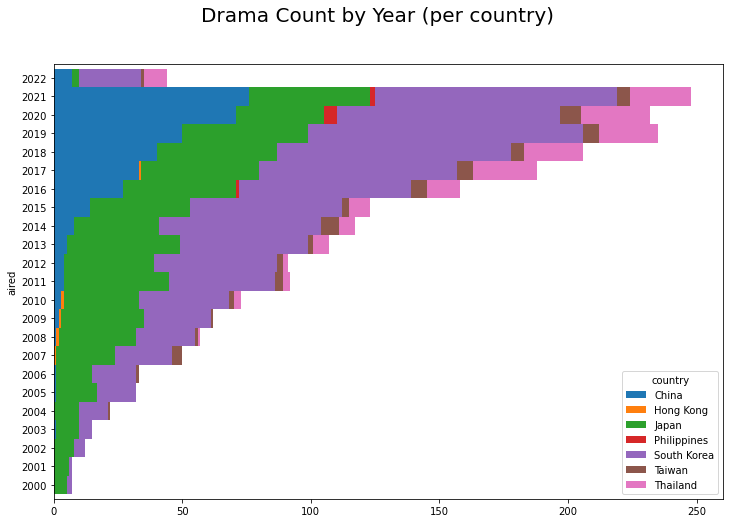

In [278]:
pd.crosstab(df2.aired,df2.country).plot.barh(stacked=True,width=1,)
fig=plt.gcf()
fig.set_size_inches(12,8)
fig.suptitle('Drama Count by Year (per country)', fontsize=20)
plt.show()